# Import Package

Package digunakan untuk membantu dalam proses development model. Model yang dibuat diharapkan dapat melakukan prediksi biaya asuransi dengan menggunakan data-data biaya medis pribadi.

In [36]:
import numpy as np # aljabar linear
import pandas as pd # pre-proses data
from sklearn.linear_model import LinearRegression # model 
from sklearn.metrics import r2_score,mean_squared_error # matriks evaluasi
from sklearn.preprocessing import LabelEncoder # mengubah format label menjadi numerik
from sklearn.preprocessing import PolynomialFeatures # mengubah feature
from sklearn.ensemble import RandomForestRegressor # algoritma boosting
import seaborn as sns # membuat diagram
import matplotlib.pyplot as plt # membuat diagram
import os

Agar hasil plotting menggunakan matplotlib dapat ditampilkan secara inline (langsung di jupyter notebook nya)

In [37]:
%matplotlib inline

# Read File

Melakukan pembacaan file csv menggunakan pandas read_csv dan mengubahnya menjadi dataframe.

In [38]:
df= pd.read_csv('insurance.csv')

# Eksplorasi Data

Untuk mengetahui karakteristik data yang ada itu seperti apa. Yang pertama adalah melihat 10 data pertama pada dataframe. Dari sini dapat diketahui juga bahwa atribut charges merupakan target/dependent variabel, dan atribut lainnya merupakan independent variabel.

In [39]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Kedua adalah melihat statistik deskriptif secara umum dari dataframe. Seperti nilai rata-rata, standar deviasi, nilai terkecil, nilai terbesar, quartil, dll.

In [40]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Ketiga adalah melihat kesimpulan umum dari dataframe. Sebagai contoh terdapat 7 kolom dengan jumlah data sebanyak 1338 baris, dengan tidak adanya data yang kosong (null) serta terdapat berbagai tipe data pada masing-masing kolom tersebut.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Terakhir adalah melihat jumlah baris dan kolom pada dataframe. Yaitu terdapat 1338 baris dan 7 kolom.

In [42]:
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (1338, 7)


Mengecek dataframe apakah memiliki data kosong.

In [43]:
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visualisasi Data

Pertama menggunakan histogram untuk menggambarkan distribusi (persebaran) dari datanya dengan menggunakan package seaborn. Dapat diketahui bahwa distribusi biaya asuransi condong ke kanan (right skewed) dan apabila dibuat versi log untuk sumbu x nya maka akan mendekati distribusi normal. 

C:\Users\h\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\h\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


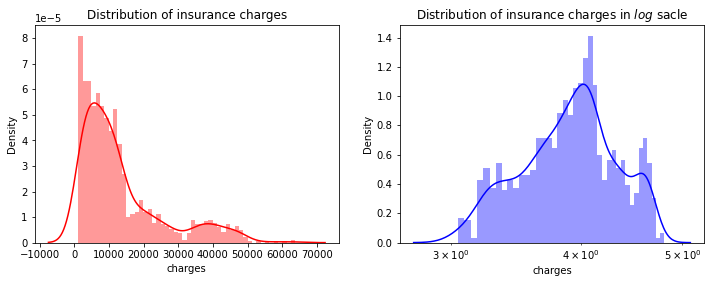

In [44]:
f= plt.figure(figsize=(12,4)) # menentukan ukuran figur diagram
ax=f.add_subplot(121) # menambahkan layout diagram
sns.distplot(df['charges'],bins=50,color='r',ax=ax) # inisialisasi histogram untuk distribusi data
ax.set_title('Distribution of insurance charges') # memberikan judul pada histogram

ax=f.add_subplot(122) # menambahkan layout diagram
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax) # inisialisasi histogram untuk distribusi data
ax.set_title('Distribution of insurance charges in $log$ sacle') # memberikan judul pada histogram
ax.set_xscale('log') # menentukan scale untuk sumbu x
plt.show() # menampilkan plot


Kedua menggunakan bar plot untuk melakukan visualisasi pada data kategorikal. Dapat diketahui bahwa:
1. pria memiliki biaya asuransi yang besar dibandingkan dengan perempuan
2. orang yg merokok juga memiliki biaya asuransi yang besar dibandingkan dengan mereka yang tidak merokok
3. wilayah tenggara (timur-selatan) merupakan wilayah yang memiliki biaya asuransi terbesar jika dibandingkan dengan 3 wilayah lainnya

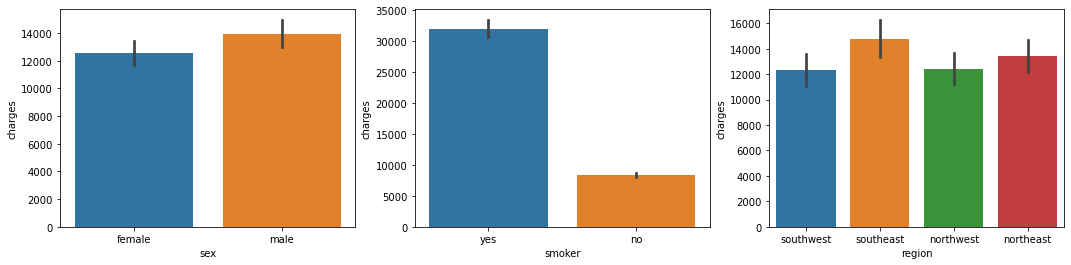

In [45]:
plt.figure(figsize=(18,4)) # menentukan ukuran figur diagram
plt.subplot(131) # menentukan layout diagram
sns.barplot(x='sex', y='charges', data=df) # inisialisasi diagram bar plot 
plt.subplot(132) # menentukan layout diagram
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

Ketiga melakukan visualisasi data menggunakan pairplot. Pairplot digunakan untuk mencari korelasi antar dimensi. Sebagai contoh bagaimana korelasi antara jumlah anak dengan biaya asuransi.

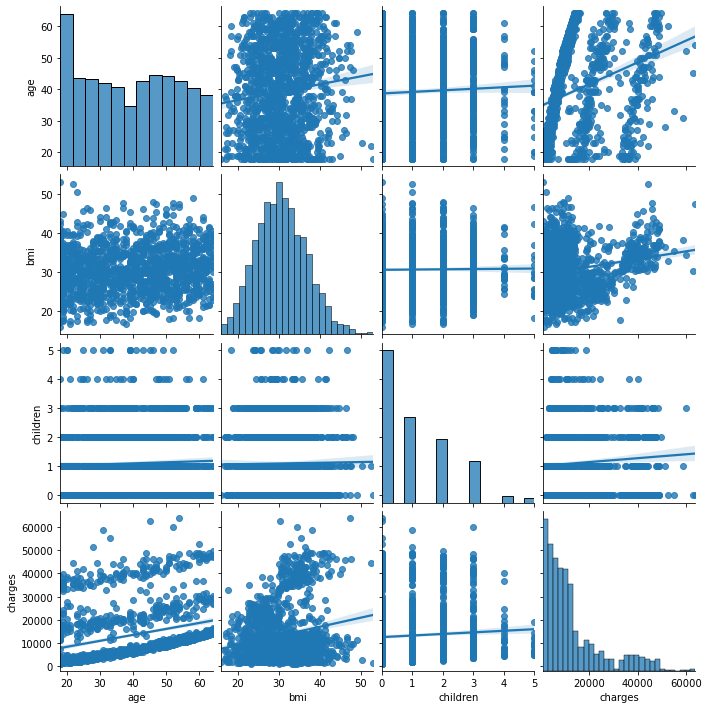

In [46]:
sns.pairplot(df,kind="reg")

Terakhir melakukan visualisasi dengan heatmap. Heatmap disini digunakan untuk matriks korelasi, yaitu mengetahui bagaimana nilai korelasi (keterkaitan) antar variabel. Semakin tinggi nilainya maka ia berkorelasi positif, begitu juga dengan sebaliknya. 

Sebagai contoh makna korelasi positif yaitu apabila variabel x naik maka variabel y juga akan naik. Apabila berkorelasi negatif maka ketika variabel x naik, variabel y justru akan turun.

<AxesSubplot:>

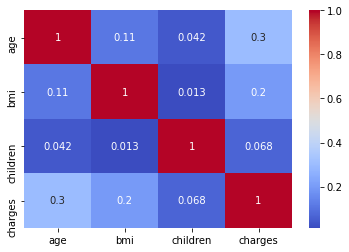

In [47]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

# Mengubah Tipe Data

Tipe data pada dataframe disamakan menjadi numerik untuk memudahkan model dalam melakukan perhitungan. Sehingga pada kolom yang bertipe kategorikal harus diubah menjadi numerik. Sebagai contoh kolom sex dan smoker diubah menjadi numerik secara manual dengan memetakan (.map) nilai masing-masing male female serta yes dan no menjadi 0 dan 1. 

In [48]:
df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

Berlaku untuk kolom region, akan tetapi menggunakan data dummy dari package pandas untuk mengisi serta mengubah tipe datanya.

In [49]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Membentuk Bagian Training dan Testing Model

Dalam pembagian data apabila tidak dituliskan secara spesifik ukuran data test nya maka secara default akan bernilai 0.25.

Selanjutnya dalam regresi linear variabel X merupakan variabel independent yaitu variabel yang berdiri sendiri dan tidak dapat dipengaruhi oleh variabel lain. Sedangkan variabel y merupakan variabel dependent yaitu variabel yang dapat dipengaruhi oleh variabel lain. Dalam hal ini regresi linear digunakan untuk melakukan prediksi.

In [50]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1) # variabel independet => selain kolom charges
y = df['charges'] # variabel dependent => kolom charges itu sendiri

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2)

# Inisialisasi model dan melakukan proses training model

Model yang digunakan dalam hal ini adalah regresi linear. Konsep dari regresi linear adalah menentukan persamaan fungsi linear yang membentuk garis regresi tersebut dengan cara melakukan proses training.

In [51]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Melakukan Prediksi

Setelah garis regresi terbentuk, garis tersebut dapat digunakan untuk melakukan prediksi dengan menggunakan data testing. 

Untuk mengevaluasi model prediksi, dalam linear regresi dapat dihitung nilai koefisien determinasinya (score regresi) dengan mengujinya menggunakan data yang sebelumnya belum pernah dilihat yaitu data testing. Ketika nilainya semakin mendekati 1 maka semakin baik.

In [52]:
y_train_pred = lr.predict(X_train) # hasil prediksi data training
y_test_pred = lr.predict(X_test) # hasil prediksi data testing
print(lr.score(X_test,y_test))

0.7499919893222637


## Menggunakan MSE & MAE

Sederhananya MSE dan MAE menghitung nilai error/kesalahan. Semakin kecil nilai error nya maka model yang terbentuk semakin baik karena mampu melakukan prediksi dengan benar. Nilai yang paling kecil adalah 0.

## MSE

In [53]:
mean_squared_error(y_test, y_test_pred)

37732501.10346643

## MAE

In [54]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

4195.001811216419

# Transformasi Fitur

Transformasi fitur menggunakan Polynomial Feature dapat meningkatkan nilai score pada regresi linear. Penyebabnya karena fitur yang sudah ada yang awalnya fungsi linear diubah menjadi fungsi Polynomial. Fungsi polynomial dapat mengubah garis linear menjadi lebih fleksibel sehingga mampu melakukan fitting data lebih baik.

In [55]:
X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147237


## MSE

In [56]:
mean_squared_error(Y_test, Y_test_pred)

18117605.544237155

## MAE

In [57]:
mean_absolute_error(Y_test, Y_test_pred)

2761.1348143598398